# Image Procesing

## Changing color space and isolate frame


In [21]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

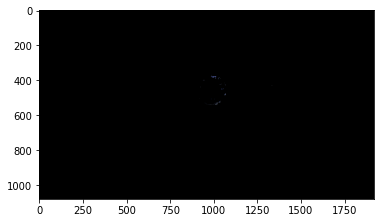

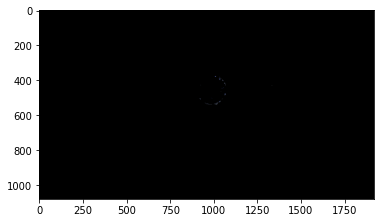

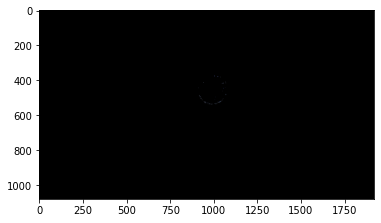

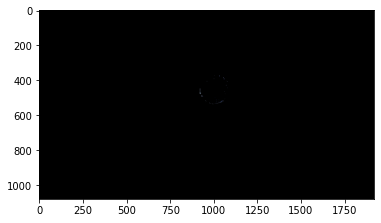

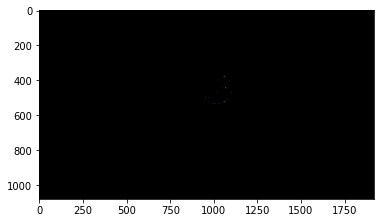

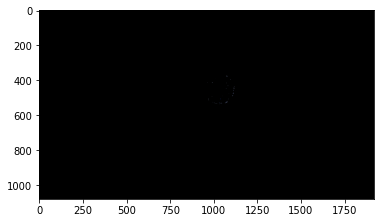

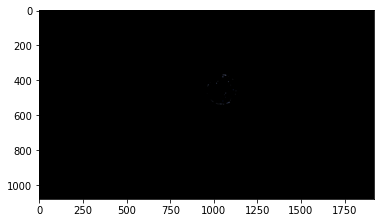

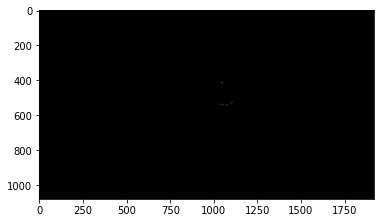

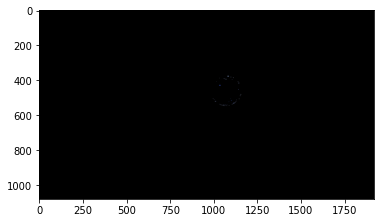

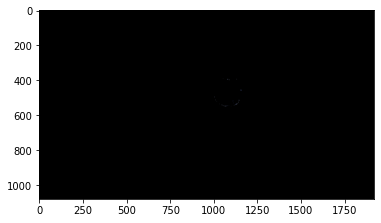

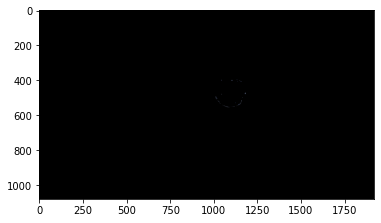

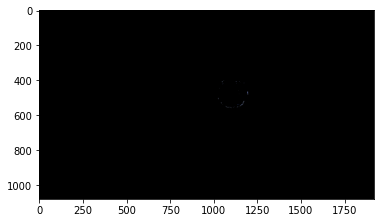

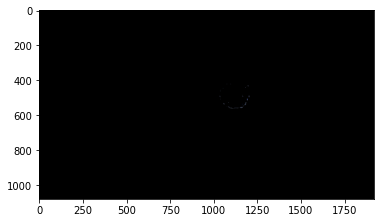

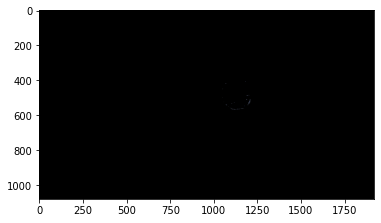

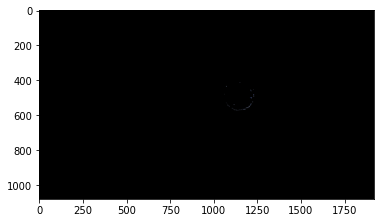

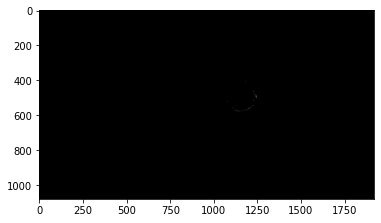

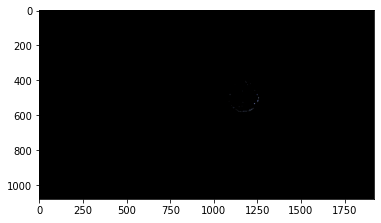

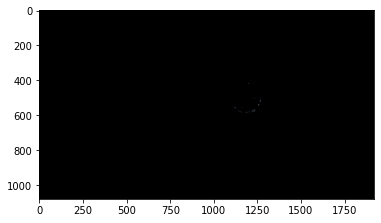

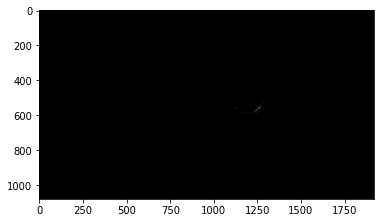

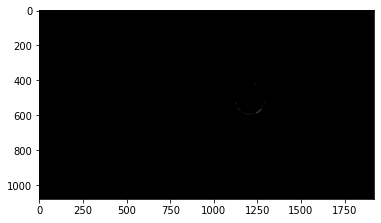

In [2]:
cap = cv2.VideoCapture('Football.mp4')

for i in range(20):
    # take each frame, 
    _, frame = cap.read()

    # convert BGR to HSV 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of orange color in HSV
    lower_org = np.array([5,50,50])
    upper_org = np.array([15,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_org, upper_org)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    #plt.imshow(hsv)
    #plt.imshow(mask, cmap='gray')
    plt.imshow(res, cmap='gray')
    plt.show()

In [3]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


## Image Thresholding 
### 1. Global Thresholding

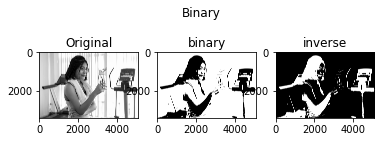

In [49]:
img = cv2.imread('test.jpg', 0)
th_lo = 100
th_up = 200
_, binary = cv2.threshold(img, th_lo, th_up, cv2.THRESH_BINARY)
_, inverse = cv2.threshold(img, th_lo, th_up, cv2.THRESH_BINARY_INV)

plt.suptitle('Binary')
plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(binary, cmap='gray'), plt.title('binary')
plt.subplot(233), plt.imshow(inverse, cmap='gray'), plt.title('inverse')
plt.show()

### 2. Adoptive thresholding
handles the image for local contrast

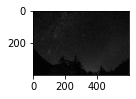

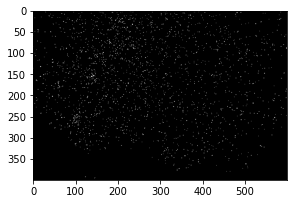

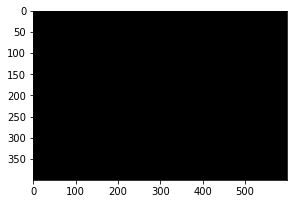

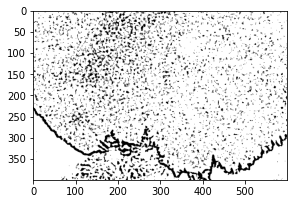

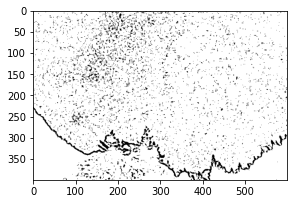

In [100]:
img = cv2.imread('star.jpg',0)
_, binary = cv2.threshold(img, 80,200,cv2.THRESH_BINARY)
img_blur = cv2.medianBlur(img, 5)

_, binary2 = cv2.threshold(img_blur, 80,200,cv2.THRESH_BINARY)
adp_binary_mean = cv2.adaptiveThreshold(img_blur,200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,2 )
adp_binary_gauss = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)

plt.subplot(321), plt.imshow(img, cmap='gray')
plt.figure(figsize=(10,12))
plt.subplot(323),plt.imshow(binary, cmap='gray')
plt.figure(figsize=(10,12))
plt.subplot(323),plt.imshow(binary2, cmap='gray')
plt.figure(figsize=(10,12))
plt.subplot(323),plt.imshow(adp_binary_mean, cmap='gray')
plt.figure(figsize=(10,12))
plt.subplot(323),plt.imshow(adp_binary_gauss, cmap='gray')
plt.show()

### 3. Otsu Thresholding

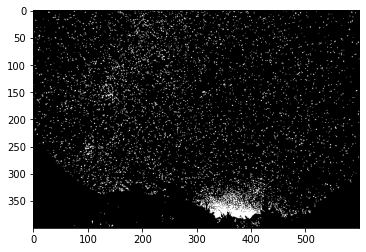

In [132]:
img = cv2.imread('star.jpg',0)

blur = cv2.GaussianBlur(img, (5,5), 0)
_, otsu_img = cv2.threshold(blur, 0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, otsu_img2 = cv2.threshold(img, 0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(321),plt.imshow(otsu_img, cmap='gray')
plt.subplot(111),plt.imshow(otsu_img2, cmap='gray')

plt.show()